In [79]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [80]:
def game(ra, rb):
    probability_a = ra/(ra + rb)
    score_a = 0
    score_b = 0
    while (score_a != 11 and score_b <=9) or (score_b != 11 and score_a <=9):
        r_number = random.random()
        if probability_a > r_number:
            score_a += 1
        else:
            score_b += 1
    return score_a, score_b


**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [81]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [82]:
def win_probability_game(ra, rb, simulations):
    a_win = 0
    prob_a = 0.00
    win = ()
    for s in range (1, simulations):
        win = game(ra, rb)
        if (win[0] >= (win[1])):
            a_win +=1
    prob_a = a_win / simulations
    return prob_a


**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [83]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30, 10000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [84]:
def read_abilities(filename):
    with open (filename) as file:
        line = file.readlines()
        ability_start = line[1:] #Ignores beginning line
        abilities = csv.reader(ability_start)
        ability_list = list([(int(i[0]), int(i[1])) for i in abilities])
        return ability_list


**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [85]:
# Print the result of calling the function for the file `test.csv`
read_abilities('test.csv')

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [86]:
def plot_win_probabilities(data):
    #Create blank lists for x and y axis
    x_list = []
    y_list =[]
    
    #Add values taken from csv file to x and y lists
    for i in data: 
        ra = i[0]
        rb = i[1]
        y_list.append(win_probability_game(ra, rb, 500))
        x_value = ra/rb
        x_list.append(x_value)
    
    #Plotting the Graph
    plt.plot(x_list, y_list, 'o')
    plt.xlabel('ra/rb')
    plt.ylabel('Probability A wins')
    plt.show()
    
        

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


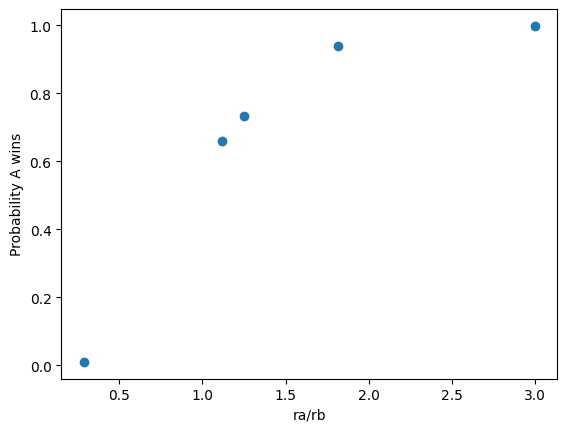

In [87]:
# Call the function to plot the figure here
plot_win_probabilities(read_abilities('test.csv')) 

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [88]:
def win_probability_match(ra, rb, simulations, m):
    wins_a = 0
    wins_b = 0
    
    for count in range (simulations):
        games_a = 0
        games_b = 0
        game_over = False
        
        while not game_over:
            score_a = game(ra, rb)
            score_b = game(ra, rb)
            if score_a > score_b:
                games_a += 1
            else:
                games_b += 1

            if games_a >= m:
                wins_a += 1
                game_over = True

            elif games_b >= m:
                wins_b += 1
                game_over = True

    probability = wins_a / simulations
    return probability

# Calculate lowest value of m here
def smallest_match(ra, rb, simulations, m_h):

    c = m_h
    p = 1
    
    for m in range(m_h, 0, -1):
        probability = win_probability_match(ra, rb, simulations, m)

        if (probability >= 0.9) and (probability < p):
            p = probability
            c = m
    return m

smallest_match(60, 40, 500, 100)

1

Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

There are two factors that need to be considered when comparing the scoring methods of PARS and English squash. When investigating which method is better I need to consider how fair and unbias the method is in order to give both participants the fairest chance to win. However, the better player should still usually win. I will also need to consider the length of each match making sure they are not too long nor too short.



## Method

To deduce which is the 'better' scoring method I will run simulations of each method of squash scoring and using these simulations I will calculate the amount of rallies per game for English and PARS to calculate which has the average shorter run time. Furthermore, I will run simulations of games to calculate the probability of A winning with each scoring method while changing the level of abiliity of A; the ability level of B will remain constant at 100 while A's ability will increment from 1 to 200. To reduce the error interval within my results I will run 100,000 simulations which will help to increase the accuracy within the probability.

To visualise the results from my simulations I will use madplotlib to plot the results on graphs. I will plot the probability of A winning and the rallies against the ability of A divided by the ability of B; this will help to see the trend between the changing ability of A and how this affects the number of rallies and the probability that A will win the game

To achieve this I will create two algorithms for each scoring method.

In [89]:
import random
import matplotlib.pyplot as plt

def game_rallies(ra, rb):
    probability_a = ra/(ra + rb)
    score_a = 0
    score_b = 0
    rallies = 0
    while (score_a != 11 and score_b <=9) or (score_b != 11 and score_a <=9):
        rallies += 1
        r_number = random.random()
        if probability_a > r_number:
            score_a += 1
        else:
            score_b += 1
    return score_a, score_b, (score_a + score_b)

def english_game(ra, rb):
    score_a = 0
    score_b = 0
    game_over = False
    english_rallies = 0
    server = random.choice(['a','b'])
    win_score = 9

    probability_a = ra/(ra + rb)

    while not game_over:
        english_rallies += 1
        r_number = random.random()
        if server == 'a':
            if probability_a > r_number:
                score_a += 1
            else:
                score_b += 1
                server = 'b'
        if server == 'b':
            if probability_a > r_number:
               score_a += 1
               server = 'a'
            else:
                score_b += 1
        if score_a == 8 and score_b == 8:
            win_score = random.choice([9, 10])
        elif score_a == win_score or score_b == win_score:
            game_over = True
    return score_a, score_b, english_rallies



def simulations(ra, rb, simulations, game_type):
    a_wins = 0
    b_wins = 0

    for s in range(1, simulations):
        
        if game_type == 'english':
            win = english_game(ra, rb)
            if (win[0] >= (win[1])):
                a_wins +=1
            else:
                b_wins +=1

        if game_type == 'pars':
            win = game(ra, rb)
            if (win[0] >= (win[1])):
                a_wins += 1
            else:
                b_wins +=1
    probability_a = a_wins/simulations
    return probability_a 

def plot_simulations(data):
    #Create blank lists for x and y axis
    x_list = []
    y_list =[]
    english_list=[]
    
    #Add values taken from csv file to x and y lists
    for i in data: 
        ra = i[0]
        rb = i[1]
        y_list.append(simulations(ra, rb, 100000, 'pars'))
        x_value = ra/rb
        x_list.append(x_value)
        english_list.append(simulations(ra, rb, 100000, 'english'))
    
    #Plotting the Graph
    plt.plot(x_list, y_list, 'o', linestyle= 'dotted')
    plt.plot(x_list, english_list, 'o', linestyle= 'dotted')
    plt.xlabel('ra/rb')
    plt.ylabel('Probability A wins')
    plt.legend(['PARS', 'English'])
    plt.title("Probability A Wins depending on Player A Ability")
    plt.show()

#Inaccurate method of plotting rallies 
#def plot_rallies(data):
    #x_list = []
    #y_list = []
    #english_list = []

    #for i in data:
        #ra = i[0]
        #rb = i[1]
        #_, _, rallies = game_rallies(ra, rb,)
        #y_list.append(rallies)
        #_, _, english_rallies = english_game(ra, rb)
        #english_list.append(english_rallies)
        #x_value = ra/rb
        #x_list.append(x_value)

    #plt.plot(x_list, y_list, 'o')
    #plt.plot(x_list, english_list, 'o')
    #plt.xlabel('ra/rb')
    #plt.ylabel('Number of Rallies')
    #plt.legend(['PARS', 'English'])
    #plt.title('Number of rallies depending on Player A Ability')

    

## Assumptions

The first assumption I have made in this report is that fatigue or injury play no factor in any of the simulations meaning that both players will play at their constant highest ability throughtout the duration of each game; this will benefit the higher ability player 

Another assumption I have made is through the use of the random module. When developing the english_game algorithm I have used random.choice for both the starting server and the condition for when both players reach the score of 8 to determine whether the game is played to 9 or 10. This randomness reduces the precision but as the range when using random.choice is so low, the effect will be minimal.

## Results

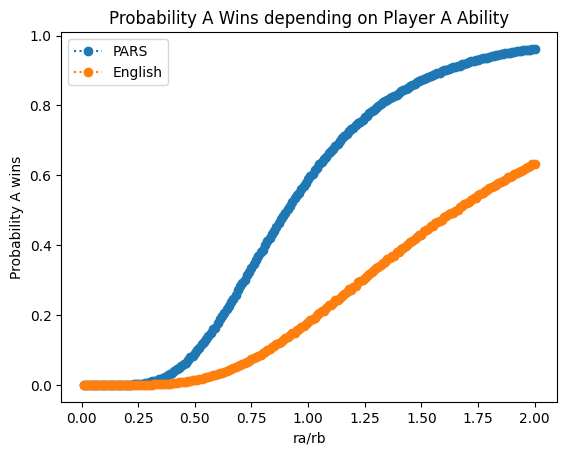

In [90]:
plot_simulations(read_abilities('values.csv'))

The first graph shows that for the same skill difference between player A and player B with the PARS method, player A has a 31.3% increased chance of winning compared to the English method of scoring; this could be due to the way the English method handles who serves. In my algorithm, each player has a 50% chance of being the server through the random module and in the English method whoever becomes server first will have an increased chance of winning meaning the skill gap is less signifcant in the English method.

The rallies graph showed that on average the English method had a longer rally time; this is due to the server only being able to score points in the English method. This graph also showed that on average less experienced players have shorter rallies than more experienced players, this is shown only the graph by the frequency density within the graph. On top of that, there are some outliers within the English graph with exceptionally high length of rallies.

Overall, my results show that PARS is the 'better' scoring method as on average as it allows for shorter game times and results in less outliers in terms of the amount of rallies. However, the data also shows that the English method is the fairer way of scoring squash games as the graph shows that player A has an increasingly higher chance of winning through the PARS method no matter their ability.

## Conclusions

My method gave some insight into which squash scoring method through analysing fairness of the methods and the total number of rallies during each game. However, more simulations and more data would give a more accurate conclusion of which method provides the better way of scoring. Moreover, without algorithms to simulate fatigue and random possible chances of injury there can be no solid evidence as to which is the most effective method. A further extension to improve the method would be to attempt to remove the random factor of some of the code to help improve precision.